In [4]:
import numpy as np
import matplotlib.pyplot as plt

class TwoLayerPerceptronSA:
    def __init__(self, input_size, input_layer_size=2, initial_temperature=1.0, cooling_rate=0.99, max_epochs=100000):
        self.input_size = input_size  # Número de entradas
        self.input_layer_size = input_layer_size  # Número de neuronas en la capa oculta
        self.initial_temperature = initial_temperature
        self.cooling_rate = cooling_rate
        self.max_epochs = max_epochs
        self.error_cut_condition = 0.005

        # Inicialización de pesos y biases como matrices y vectores separados
        # Pesos y bias para la capa oculta
        self.W = np.random.uniform(-1, 1, (self.input_size, self.input_layer_size))
        self.b_input_layer = np.random.uniform(-1, 1, (1, self.input_layer_size))

        # Pesos y bias para la capa de salida
        self.V = np.random.uniform(-1, 1, (self.input_layer_size, 1))
        self.b_output = np.random.uniform(-1, 1, (1, 1))

        # Lista para almacenar el error en cada época
        self.errors_ = []

    def sigmoid(self, x):
        """Función de activación sigmoide"""
        return 1 / (1 + np.exp(-x))

    def compute_error(self, X, z, W, b_input_layer, V, b_output):
        """Calcula el error cuadrático medio dado un conjunto de pesos y biases"""

        # FORWARD PASS
        # Capa oculta
        input_layer_input = np.dot(X, W) + b_input_layer
        input_layer_output = self.sigmoid(input_layer_input)

        # Capa de salida
        final_input = np.dot(input_layer_output, V) + b_output
        final_output = self.sigmoid(final_input)

        # Calcular el error
        error = z - final_output
        mse = np.mean(np.square(error))
        return mse

    def perturb_parameters(self, W, b_input_layer, V, b_output, sigma=0.1):
        """Genera nuevos pesos y biases perturbando ligeramente los actuales con una distribución normal"""
        new_W = W + np.random.normal(0, sigma, size=W.shape)
        new_b_input_layer = b_input_layer + np.random.normal(0, sigma, size=b_input_layer.shape)
        new_V = V + np.random.normal(0, sigma, size=V.shape)
        new_b_output = b_output + np.random.normal(0, sigma, size=b_output.shape)
        return new_W, new_b_input_layer, new_V, new_b_output

    def train(self, X, z):
        """Entrena la red neuronal usando Simulated Annealing con perturbaciones normales"""
        # Inicializar temperatura
        T = self.initial_temperature

        # Evaluar el error inicial
        current_W = self.W
        current_b_input_layer = self.b_input_layer
        current_V = self.V
        current_b_output = self.b_output

        current_error = self.compute_error(X, z, current_W, current_b_input_layer, current_V, current_b_output)

        for epoch in range(self.max_epochs):
            # Generar nueva solución candidata perturbando los pesos y biases actuales
            candidate_W, candidate_b_input_layer, candidate_V, candidate_b_output = self.perturb_parameters(
                current_W, current_b_input_layer, current_V, current_b_output
            )

            # Calcular el error de la nueva solución
            candidate_error = self.compute_error(X, z, candidate_W, candidate_b_input_layer, candidate_V, candidate_b_output)

            # Calcular diferencia de energía (error)
            delta_E = candidate_error - current_error

            # Decidir si aceptamos la nueva solución
            if delta_E <= 0:
                # Aceptamos la nueva solución porque es mejor
                current_W = candidate_W
                current_b_input_layer = candidate_b_input_layer
                current_V = candidate_V
                current_b_output = candidate_b_output
                current_error = candidate_error
            else:
                # Aceptamos con probabilidad p
                p = np.exp(-delta_E / T)
                if np.random.rand() < p:
                    current_W = candidate_W
                    current_b_input_layer = candidate_b_input_layer
                    current_V = candidate_V
                    current_b_output = candidate_b_output
                    current_error = candidate_error

            # Almacenar el error actual
            self.errors_.append(current_error)

            # Condición de corte: detener si el ECM es menor a 0.005
            if current_error < self.error_cut_condition:
                print(f"Entrenamiento detenido en la época {epoch + 1} debido a que el ECM alcanzó {current_error:.6f}")
                break

            # Enfriamiento: actualizar la temperatura
            T = T * self.cooling_rate

            # Opcional: mostrar progreso cada cierto número de épocas
            if (epoch + 1) % 1000 == 0:
                print(f"Época {epoch + 1}, Error: {current_error:.6f}, Temperatura: {T:.6f}")

        # Al finalizar, actualizar los pesos y biases de la red
        self.W = current_W
        self.b_input_layer = current_b_input_layer
        self.V = current_V
        self.b_output = current_b_output

    def predict(self, X):
        """Realiza predicciones usando la red neuronal entrenada"""
        # FORWARD PASS
        # Capa oculta
        input_layer_input = np.dot(X, self.W) + self.b_input_layer
        input_layer_output = self.sigmoid(input_layer_input)

        # Capa de salida
        final_input = np.dot(input_layer_output, self.V) + self.b_output
        final_output = self.sigmoid(final_input)

        # Convertir la salida a 0 o 1
        return np.where(final_output >= 0.5, 1, 0)

    def plot_errors(self, title='Evolución del error durante el entrenamiento'):
        """Grafica la evolución del error cuadrático medio durante el entrenamiento"""
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, len(self.errors_) + 1), self.errors_, marker='o')
        plt.xlabel('Épocas')
        plt.ylabel('Error cuadrático medio')
        plt.title(title)
        plt.grid(True)
        plt.show()

Época 1000, Error: 0.012847, Temperatura: 0.000043
Entrenamiento detenido en la época 1065 debido a que el ECM alcanzó 0.004649
Input:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Expected Output:
 [0 1 1 0]
Predicted Output:
 [0 1 1 0]


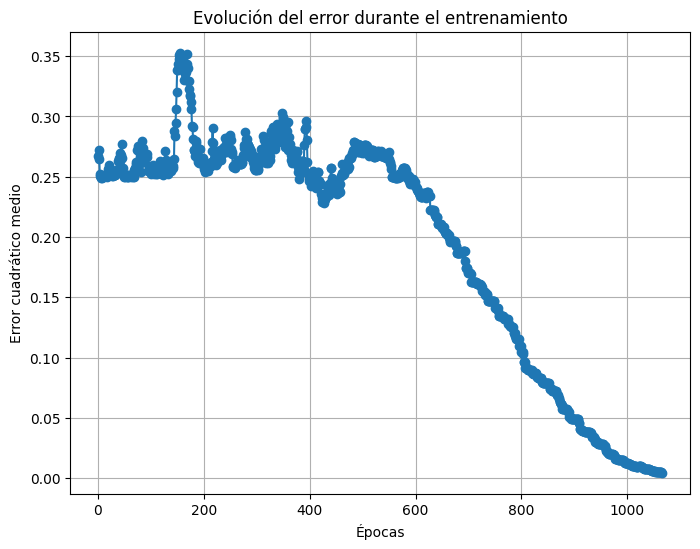

In [ ]:
import numpy as np

# Define XOR inputs and outputs
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

z = np.array([[0], [1], [1], [0]])

# Initialize the perceptron
perceptron = TwoLayerPerceptronSA(input_size=2)

# Train the model
perceptron.train(X, z)

# Predict
predictions = perceptron.predict(X)

# Plot training error
perceptron.plot_errors()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random


In [7]:
def data(N, fig):
    if fig == 'Square':
        x = np.random.uniform(-1,1,N)
        y = np.random.uniform(-1,1,N)
    elif fig == 'Circle':
        x = np.random.uniform(-1,1,N)
        y = np.array([random.uniform(-math.sqrt(1 - v**2), math.sqrt(1 - v**2)) for v in x ]) 
    elif fig == 'Parable':
        x = np.random.uniform(1,2,int(N))
        y = np.array([random.uniform(-math.sqrt(v**2-1), math.sqrt(v**2-1)) for v in x ])
    elif fig == 'Hyperbola':
        x = np.concatenate((np.random.uniform(-2,-1,int(N/2)), np.random.uniform(1,2,int(N/2))))
        y = np.array([random.uniform(-math.sqrt(v**2-1), math.sqrt(v**2-1)) for v in x ])
        if N%2 != 0:
            return np.array([[x[i], y[i]] for i in range(N-1)])
    else:
        np.random.seed(0)
        x = np.random.normal(0, 1, N)
        y = np.random.normal(0, 1, N)
    return np.array([[x[i], y[i]] for i in range(N)])

def Kohonen_train(xi, N, sigma, eta, step, lim):
    W = np.array([np.random.uniform(-0.01, 0.01, xi.shape[1]) for i in range(N)])
    #W = np.array([np.random.normal(0, 1, xi.shape[1]) for i in range(N)])
    M = int(math.sqrt(N))
    
    while sigma > lim:
        np.random.shuffle(xi)
        for vector in xi:
            dist = np.array([math.sqrt(np.sum((vector - weights)**2)) for weights in W])
            loc = np.where(dist == np.min(dist))[0][0]
    
            neighbours = np.array([np.array([math.exp(-math.sqrt(np.sum((np.array([i,j])-np.array([loc//M, loc%M]))**2))**2/(2*sigma**2)) 
                                         for j in range(M)]) for i in range(M)])
    
            neighbours = neighbours.flatten()
            for i in range(len(W)):
                for j in range(2):
                    W[i][j] += eta*neighbours[i]*(vector[j] - W[i][j])
                    
                    
        sigma -= sigma*step 
    return W

In [8]:
L = 100
N = 100
lim = 0.1
step = 0.01
eta = 0.6
sigma = 2

xi_1 = data(L, fig ='Square')
W_1 = Kohonen_train(xi_1, N, sigma, eta, step, lim)

xi_2 = data(L, fig ='Circle')
W_2 = Kohonen_train(xi_2, N, sigma, eta, step, lim)

xi_3 = data(L, fig ='Parable')
W_3 = Kohonen_train(xi_3, N, sigma, eta, step, lim)

xi_4 = data(L, fig ='Hyperbola')
W_4 = Kohonen_train(xi_4, N, sigma, eta, step, lim)

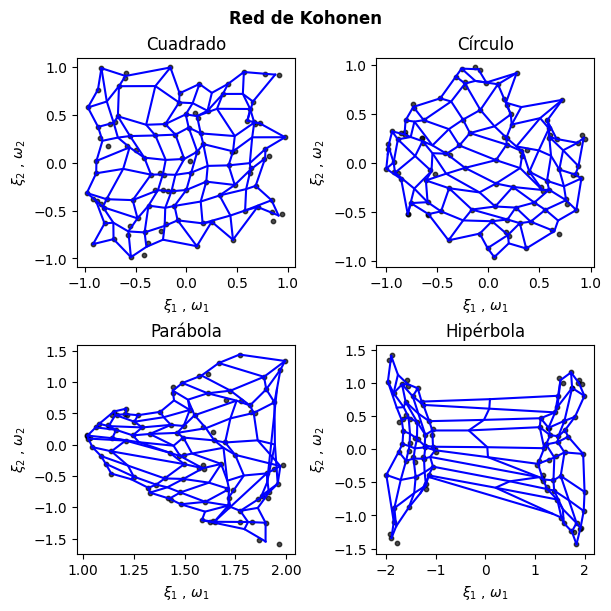

In [9]:
fig, ax = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(6,6))
M = int(math.sqrt(N))
fig.suptitle('Red de Kohonen', fontweight ="bold")

ax[0, 0].plot()
ax[0, 0].plot(W_1[:,0].reshape(M, M), W_1[:,1].reshape(M, M), color='blue')
ax[0, 0].plot(np.transpose(W_1[:,0].reshape(M, M)), np.transpose(W_1[:,1].reshape(M, M)), color = 'blue')
ax[0, 0].scatter(xi_1[:,0], xi_1[:,1], alpha=0.7, s= 10, color='black')
ax[0, 0].set_xlabel(r'$\xi_1$ , $\omega_1$')
ax[0, 0].set_ylabel(r'$\xi_2$ , $\omega_2$')
ax[0, 0].set_title('Cuadrado')

ax[0, 1].plot()
ax[0, 1].plot(W_2[:,0].reshape(M, M), W_2[:,1].reshape(M, M), color='blue')
ax[0, 1].plot(np.transpose(W_2[:,0].reshape(M, M)), np.transpose(W_2[:,1].reshape(M, M)), color = 'blue')
ax[0, 1].scatter(xi_2[:,0], xi_2[:,1], alpha=0.7, s= 10, color='black')
ax[0, 1].set_xlabel(r'$\xi_1$ , $\omega_1$')
ax[0, 1].set_ylabel(r'$\xi_2$ , $\omega_2$')
ax[0, 1].set_title('Círculo')


ax[1, 0].plot()
ax[1, 0].plot(W_3[:,0].reshape(M, M), W_3[:,1].reshape(M, M), color='blue')
ax[1, 0].plot(np.transpose(W_3[:,0].reshape(M, M)), np.transpose(W_3[:,1].reshape(M, M)), color = 'blue')
ax[1, 0].scatter(xi_3[:,0], xi_3[:,1], alpha=0.7, s= 10, color='black')
ax[1, 0].set_xlabel(r'$\xi_1$ , $\omega_1$')
ax[1, 0].set_ylabel(r'$\xi_2$ , $\omega_2$')
ax[1, 0].set_title('Parábola')

ax[1, 1].plot()
ax[1, 1].plot(W_4[:,0].reshape(M, M), W_4[:,1].reshape(M, M), color='blue')
ax[1, 1].plot(np.transpose(W_4[:,0].reshape(M, M)), np.transpose(W_4[:,1].reshape(M, M)), color = 'blue')
ax[1, 1].scatter(xi_4[:,0], xi_4[:,1], alpha=0.7, s= 10, color='black')
ax[1, 1].set_xlabel(r'$\xi_1$ , $\omega_1$')
ax[1, 1].set_ylabel(r'$\xi_2$ , $\omega_2$')
ax[1, 1].set_title('Hipérbola')

plt.show()

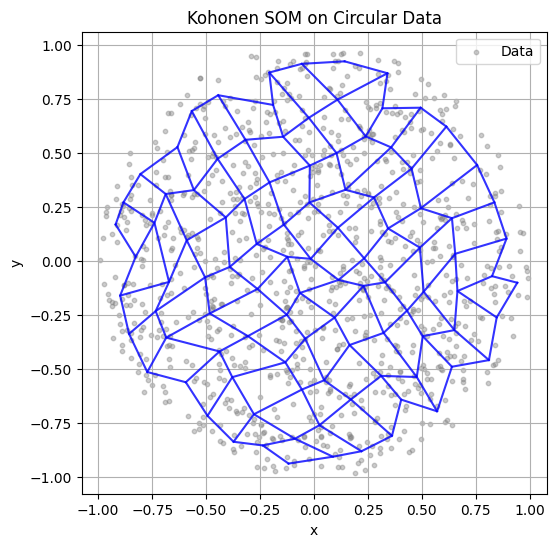

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Generate data points from a circular distribution
def generate_circle_data(num_points=1000):
    # Generate uniform angles and radii to get points inside a unit circle
    angles = np.random.uniform(0, 2*np.pi, num_points)
    radii = np.sqrt(np.random.uniform(0, 1, num_points))
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    return np.column_stack((x, y))

# Initialize SOM parameters
M = 10  # dimension of the lattice (M x M)
N = M * M  # total number of neurons
data = generate_circle_data(num_points=1000)

# Each neuron in the SOM is represented by a weight vector (w_x, w_y)
# Initialize weights close to zero
W = np.random.uniform(-0.01, 0.01, (N, 2))

# Initial learning parameters
eta = 0.5        # initial learning rate
eta_final = 0.01 # final learning rate after all epochs
sigma = 3.0       # initial neighborhood radius
sigma_final = 0.1 # final sigma
epochs = 100      # total training epochs

# Linearly decrease parameters over epochs
def linear_anneal(initial, final, t, T):
    return initial * (1 - t/T) + final * (t/T)

for epoch in range(epochs):
    # Shuffle data each epoch
    np.random.shuffle(data)
    
    # Update parameters gradually
    current_eta = linear_anneal(eta, eta_final, epoch, epochs-1)
    current_sigma = linear_anneal(sigma, sigma_final, epoch, epochs-1)
    
    # Train with each data point
    for x in data:
        # Find BMU
        dists = np.sqrt(((W - x)**2).sum(axis=1))
        bmu_idx = np.argmin(dists)
        
        # Compute BMU location on the lattice
        bmu_i = bmu_idx // M
        bmu_j = bmu_idx % M
        
        # Update weights of neighbors
        for i in range(M):
            for j in range(M):
                # Compute lattice distance between (i,j) and BMU (bmu_i, bmu_j)
                dist_sq = (i - bmu_i)**2 + (j - bmu_j)**2
                # Neighborhood function (Gaussian)
                h = math.exp(-dist_sq / (2 * current_sigma**2))
                
                # Update weight vector
                idx = i*M + j
                W[idx] += current_eta * h * (x - W[idx])

# After training, let's plot the results
# Plot data points
plt.figure(figsize=(6,6))
plt.scatter(data[:,0], data[:,1], s=10, alpha=0.4, color='gray', label='Data')

# Plot the SOM lattice
W_x = W[:,0].reshape(M, M)
W_y = W[:,1].reshape(M, M)

# Draw horizontal lines
for i in range(M):
    plt.plot(W_x[i, :], W_y[i, :], color='blue', alpha=0.8)
# Draw vertical lines
for j in range(M):
    plt.plot(W_x[:, j], W_y[:, j], color='blue', alpha=0.8)

plt.title("Kohonen SOM on Circular Data")
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


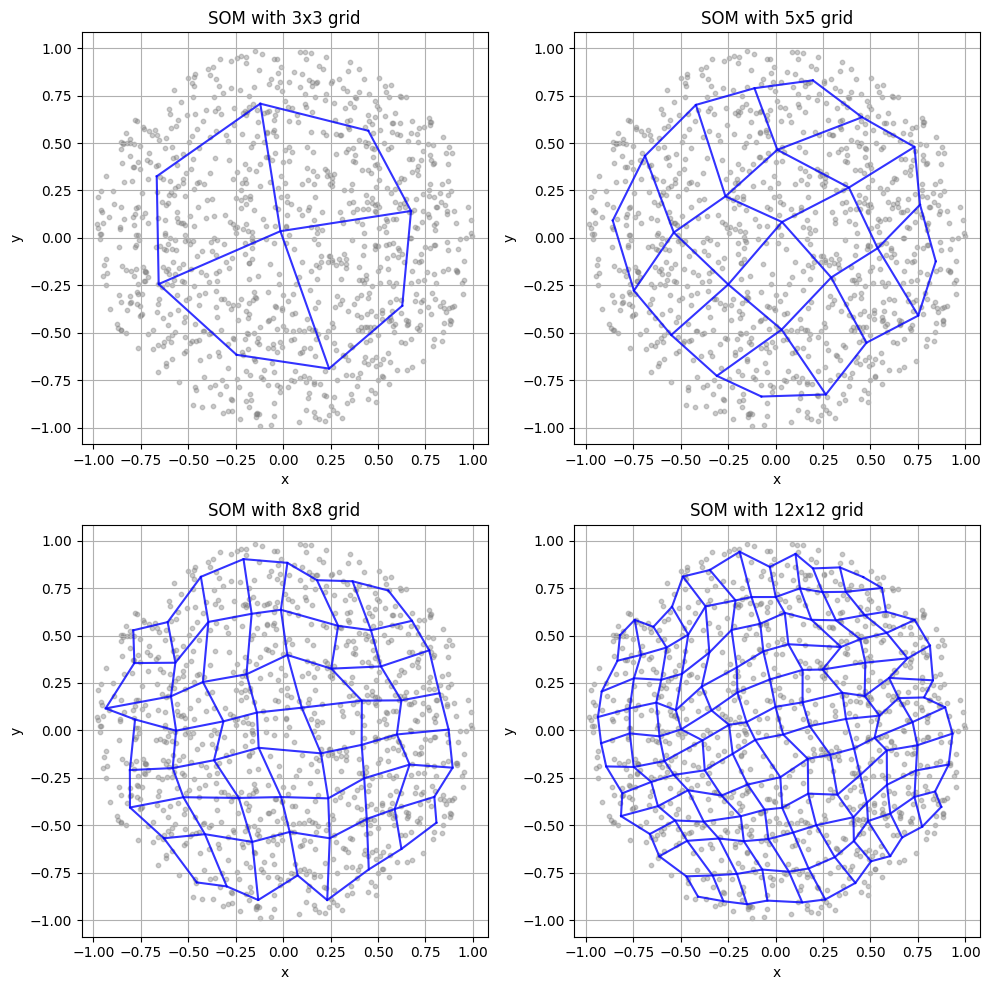

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

def generate_circle_data(num_points=1000):
    # Generate uniform angles and radii for points inside a unit circle
    angles = np.random.uniform(0, 2*np.pi, num_points)
    radii = np.sqrt(np.random.uniform(0, 1, num_points))
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    return np.column_stack((x, y))

def linear_anneal(initial, final, t, T):
    # Linear interpolation between initial and final values over T steps
    return initial * (1 - t/T) + final * (t/T)

def train_som(data, M=10, epochs=100, eta=0.5, eta_final=0.01, sigma=3.0, sigma_final=0.1):
    N = M * M
    W = np.random.uniform(-0.01, 0.01, (N, 2))
    for epoch in range(epochs):
        np.random.shuffle(data)
        current_eta = linear_anneal(eta, eta_final, epoch, epochs-1)
        current_sigma = linear_anneal(sigma, sigma_final, epoch, epochs-1)
        
        for x in data:
            # Find BMU
            dists = np.sqrt(((W - x)**2).sum(axis=1))
            bmu_idx = np.argmin(dists)
            
            # BMU coordinates
            bmu_i = bmu_idx // M
            bmu_j = bmu_idx % M
            
            # Update neighbors
            for i in range(M):
                for j in range(M):
                    dist_sq = (i - bmu_i)**2 + (j - bmu_j)**2
                    h = math.exp(-dist_sq / (2 * current_sigma**2))
                    idx = i*M + j
                    W[idx] += current_eta * h * (x - W[idx])
    
    return W

# Main comparison code
data = generate_circle_data(num_points=1000)

# Different grid sizes to compare
M_values = [3,5,8,12]

# Prepare a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

for i, M in enumerate(M_values):
    W = train_som(data, M=M, epochs=100, eta=0.5, eta_final=0.01, sigma=3.0, sigma_final=0.1)
    W_x = W[:,0].reshape(M, M)
    W_y = W[:,1].reshape(M, M)
    
    ax = axes[i]
    ax.scatter(data[:,0], data[:,1], s=10, alpha=0.4, color='gray', label='Data')
    # Draw horizontal lines
    for r in range(M):
        ax.plot(W_x[r, :], W_y[r, :], color='blue', alpha=0.8)
    # Draw vertical lines
    for c in range(M):
        ax.plot(W_x[:, c], W_y[:, c], color='blue', alpha=0.8)
    ax.set_title(f"SOM with {M}x{M} grid")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.axis('equal')
    ax.grid(True)

plt.tight_layout()
plt.show()


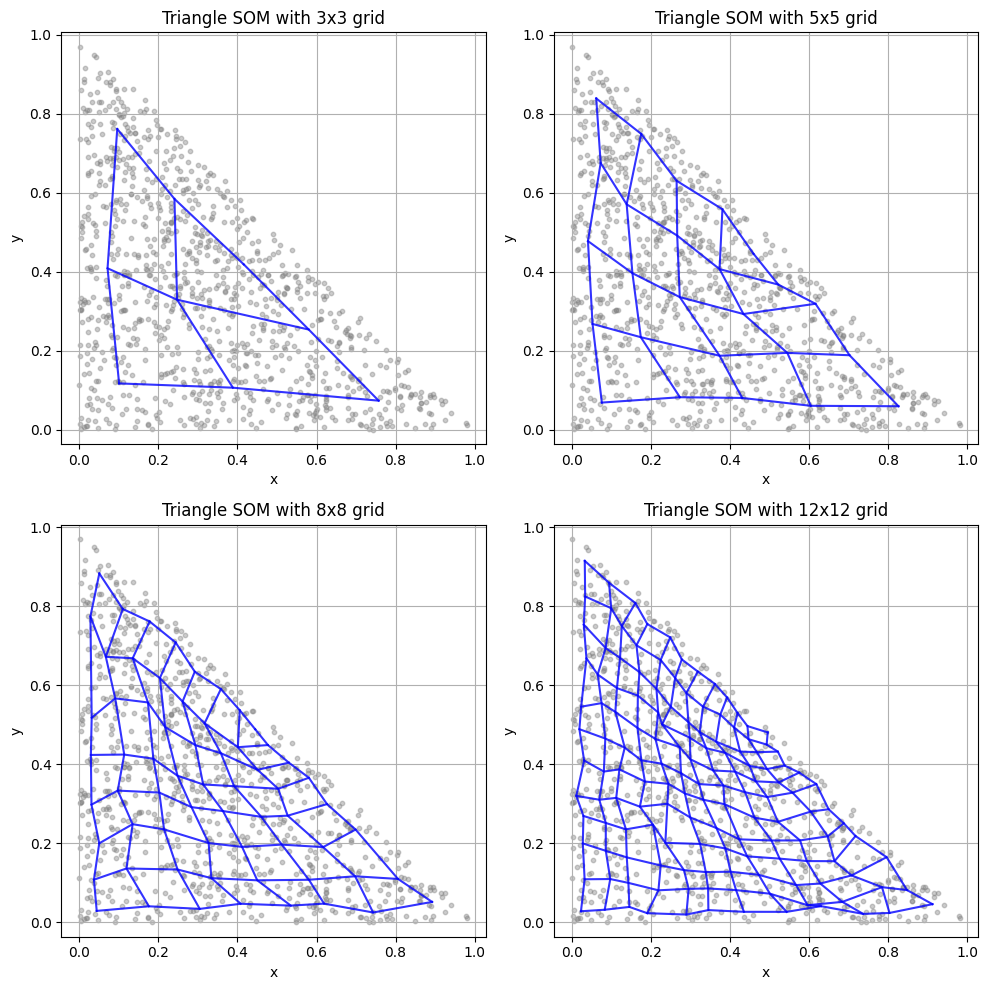

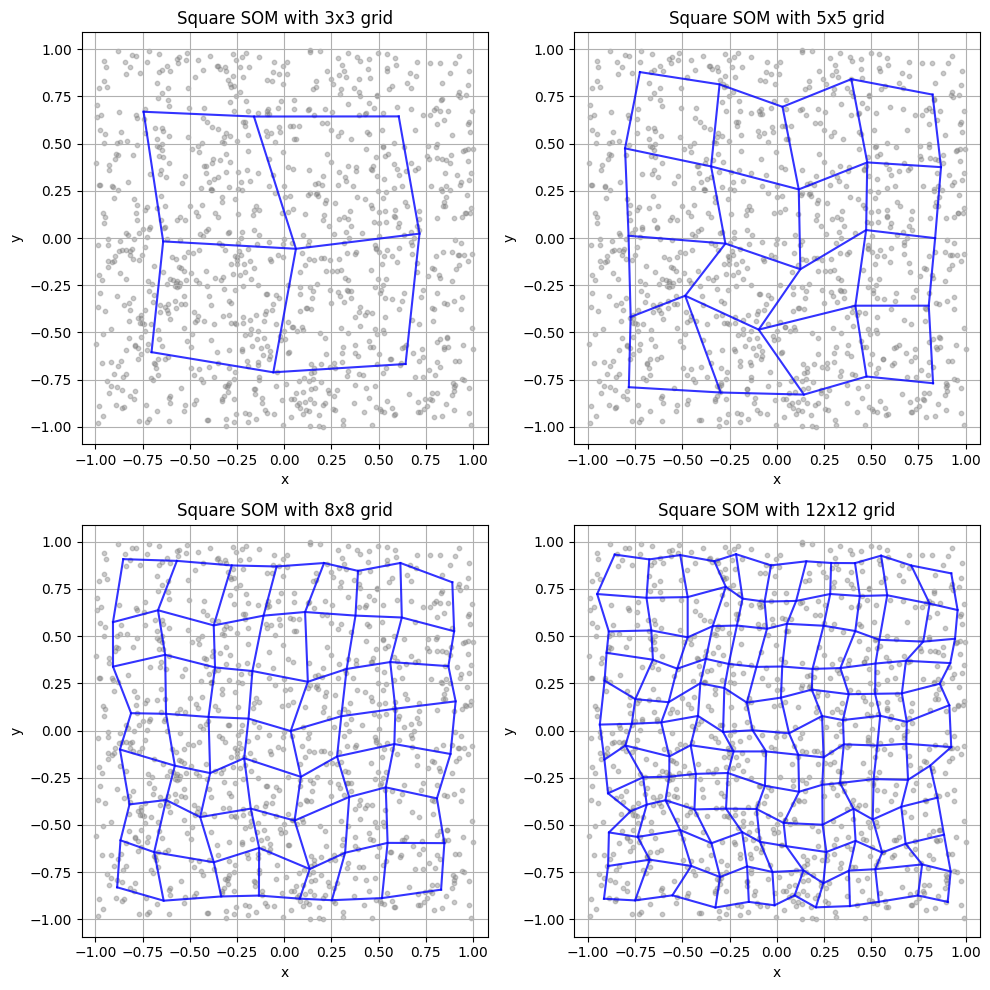

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

def generate_circle_data(num_points=1000):
    # Generate uniform angles and radii for points inside a unit circle
    angles = np.random.uniform(0, 2*np.pi, num_points)
    radii = np.sqrt(np.random.uniform(0, 1, num_points))
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    return np.column_stack((x, y))

def generate_triangle_data(num_points=1000):
    # Generate points uniformly inside the triangle with vertices (0,0), (1,0), (0,1)
    # A common method: pick two random numbers u and v from uniform(0,1), 
    # if u+v>1, reflect them (u->1-u, v->1-v) to ensure uniform distribution in the triangle.
    u = np.random.uniform(0,1,num_points)
    v = np.random.uniform(0,1,num_points)
    # Mask where u+v > 1, reflect those
    mask = (u+v > 1)
    u[mask] = 1 - u[mask]
    v[mask] = 1 - v[mask]

    # Now (u,v) are uniformly distributed in the triangle formed by (0,0), (1,0), (0,1)
    x = u
    y = v
    return np.column_stack((x, y))

def generate_square_data(num_points=1000):
    # Generate points uniformly inside a square. For symmetry, use [-1,1]x[-1,1].
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)
    return np.column_stack((x, y))

def linear_anneal(initial, final, t, T):
    # Linear interpolation between initial and final values over T steps
    return initial * (1 - t/T) + final * (t/T)

def train_som(data, M=10, epochs=100, eta=0.5, eta_final=0.01, sigma=3.0, sigma_final=0.1):
    N = M * M
    W = np.random.uniform(-0.01, 0.01, (N, 2))
    for epoch in range(epochs):
        np.random.shuffle(data)
        current_eta = linear_anneal(eta, eta_final, epoch, epochs-1)
        current_sigma = linear_anneal(sigma, sigma_final, epoch, epochs-1)
        
        for x in data:
            # Find BMU
            dists = np.sqrt(((W - x)**2).sum(axis=1))
            bmu_idx = np.argmin(dists)
            
            # BMU coordinates
            bmu_i = bmu_idx // M
            bmu_j = bmu_idx % M
            
            # Update neighbors
            for i in range(M):
                for j in range(M):
                    dist_sq = (i - bmu_i)**2 + (j - bmu_j)**2
                    h = math.exp(-dist_sq / (2 * current_sigma**2))
                    idx = i*M + j
                    W[idx] += current_eta * h * (x - W[idx])
    
    return W

# Compare different SOM grids for the triangle
triangle_data = generate_triangle_data(num_points=1000)
M_values = [3,5,8,12]
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()
for i, M in enumerate(M_values):
    W = train_som(triangle_data, M=M, epochs=100, eta=0.5, eta_final=0.01, sigma=3.0, sigma_final=0.1)
    W_x = W[:,0].reshape(M, M)
    W_y = W[:,1].reshape(M, M)
    
    ax = axes[i]
    ax.scatter(triangle_data[:,0], triangle_data[:,1], s=10, alpha=0.4, color='gray', label='Data')
    # Draw horizontal lines
    for r in range(M):
        ax.plot(W_x[r, :], W_y[r, :], color='blue', alpha=0.8)
    # Draw vertical lines
    for c in range(M):
        ax.plot(W_x[:, c], W_y[:, c], color='blue', alpha=0.8)
    ax.set_title(f"Triangle SOM with {M}x{M} grid")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.axis('equal')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Compare different SOM grids for the square
square_data = generate_square_data(num_points=1000)
M_values = [3,5,8,12]
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()
for i, M in enumerate(M_values):
    W = train_som(square_data, M=M, epochs=100, eta=0.5, eta_final=0.01, sigma=3.0, sigma_final=0.1)
    W_x = W[:,0].reshape(M, M)
    W_y = W[:,1].reshape(M, M)
    
    ax = axes[i]
    ax.scatter(square_data[:,0], square_data[:,1], s=10, alpha=0.4, color='gray', label='Data')
    # Draw horizontal lines
    for r in range(M):
        ax.plot(W_x[r, :], W_y[r, :], color='blue', alpha=0.8)
    # Draw vertical lines
    for c in range(M):
        ax.plot(W_x[:, c], W_y[:, c], color='blue', alpha=0.8)
    ax.set_title(f"Square SOM with {M}x{M} grid")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.axis('equal')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math

def linear_anneal(initial, final, t, T):
    return initial * (1 - t/T) + final * (t/T)

def generate_square_data(num_points=1000):
    # Generate points uniformly inside a square. For example: [-1,1]x[-1,1].
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)
    return np.column_stack((x, y))

# Generate data points from a circular distribution
def generate_circle_data(num_points=1000):
    # Generate uniform angles and radii to get points inside a unit circle
    angles = np.random.uniform(0, 2*np.pi, num_points)
    radii = np.sqrt(np.random.uniform(0, 1, num_points))
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    return np.column_stack((x, y))

def generate_triangle_data(num_points=1000):
    # Generate points uniformly inside the triangle with vertices (0,0), (1,0), (0,1)
    # A common method: pick two random numbers u and v from uniform(0,1), 
    # if u+v>1, reflect them (u->1-u, v->1-v) to ensure uniform distribution in the triangle.
    u = np.random.uniform(0,1,num_points)
    v = np.random.uniform(0,1,num_points)
    # Mask where u+v > 1, reflect those
    mask = (u+v > 1)
    u[mask] = 1 - u[mask]
    v[mask] = 1 - v[mask]

    # Now (u,v) are uniformly distributed in the triangle formed by (0,0), (1,0), (0,1)
    x = u
    y = v
    return np.column_stack((x, y))

class SOM:
    def __init__(self, M, data, epochs=100, eta=0.5, eta_final=0.01, sigma=3.0, sigma_final=0.1):
        """
        Initialize the SOM.
        
        Parameters:
        - M: int, size of the grid (M x M)
        - data: numpy array of shape (N, 2), the input data
        - epochs: int, number of training epochs
        - eta: float, initial learning rate
        - eta_final: float, final learning rate (linearly annealed)
        - sigma: float, initial neighborhood radius
        - sigma_final: float, final neighborhood radius (linearly annealed)
        """
        self.M = M
        self.data = data
        self.epochs = epochs
        self.eta = eta
        self.eta_final = eta_final
        self.sigma = sigma
        self.sigma_final = sigma_final
        
        # Initialize weights
        self.W = np.random.uniform(-0.01, 0.01, (M*M, 2))
    
    def train(self):
        """
        Train the SOM using the provided data.
        """
        N = self.M * self.M
        for epoch in range(self.epochs):
            np.random.shuffle(self.data)
            current_eta = linear_anneal(self.eta, self.eta_final, epoch, self.epochs-1)
            current_sigma = linear_anneal(self.sigma, self.sigma_final, epoch, self.epochs-1)
            
            for x in self.data:
                # Find Best Matching Unit (BMU)
                dists = np.sqrt(((self.W - x)**2).sum(axis=1))
                bmu_idx = np.argmin(dists)
                
                # BMU coordinates on the grid
                bmu_i = bmu_idx // self.M
                bmu_j = bmu_idx % self.M
                
                # Update neighbors
                for i in range(self.M):
                    for j in range(self.M):
                        dist_sq = (i - bmu_i)**2 + (j - bmu_j)**2
                        h = math.exp(-dist_sq / (2 * current_sigma**2))
                        idx = i*self.M + j
                        self.W[idx] += current_eta * h * (x - self.W[idx])
    
    def plot(self, ax=None, show_data=True, title=None):
        """
        Plot the SOM grid along with the data.
        
        Parameters:
        - ax: A matplotlib Axes object (optional). If None, a new figure is created.
        - show_data: bool, whether to show the underlying data points
        - title: str, title of the plot
        """
        if ax is None:
            fig, ax = plt.subplots(figsize=(6,6))
        
        # Reshape W into a grid
        W_x = self.W[:,0].reshape(self.M, self.M)
        W_y = self.W[:,1].reshape(self.M, self.M)
        
        if show_data:
            ax.scatter(self.data[:,0], self.data[:,1], s=10, alpha=0.4, color='gray', label='Data')
        
        # Plot the SOM grid
        # Draw horizontal lines
        for r in range(self.M):
            ax.plot(W_x[r, :], W_y[r, :], color='blue', alpha=0.8)
        # Draw vertical lines
        for c in range(self.M):
            ax.plot(W_x[:, c], W_y[:, c], color='blue', alpha=0.8)
        
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        if title is not None:
            ax.set_title(title)
        ax.axis('equal')
        ax.grid(True)
        plt.show()




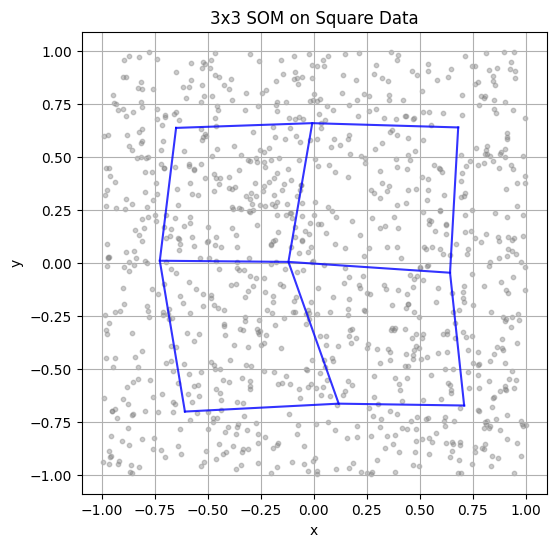

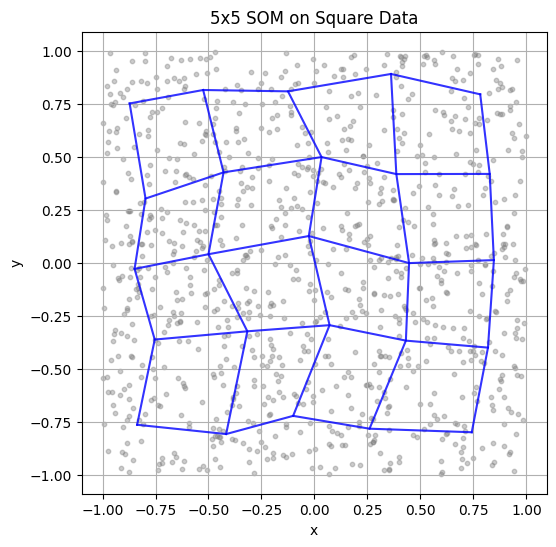

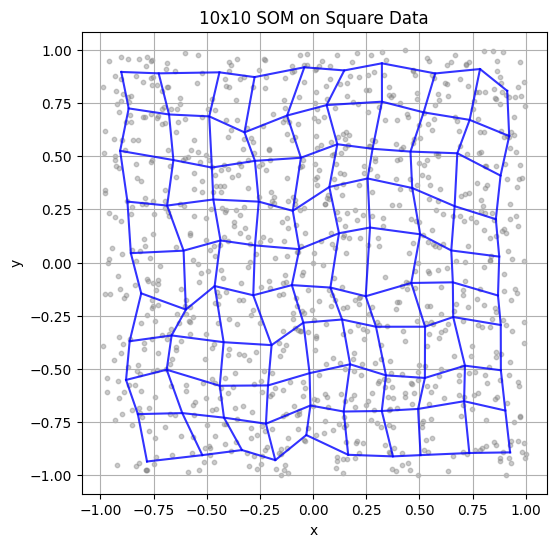

In [12]:
# Example usage:
som = SOM(M=3, data=generate_square_data(num_points=1000), epochs=100)
som.train()
som.plot(title="3x3 SOM on Square Data")
# Example usage:
som = SOM(M=5, data=generate_square_data(num_points=1000), epochs=100)
som.train()
som.plot(title="5x5 SOM on Square Data")
# Example usage:
som = SOM(M=10, data=generate_square_data(num_points=1000), epochs=100)
som.train()
som.plot(title="10x10 SOM on Square Data")

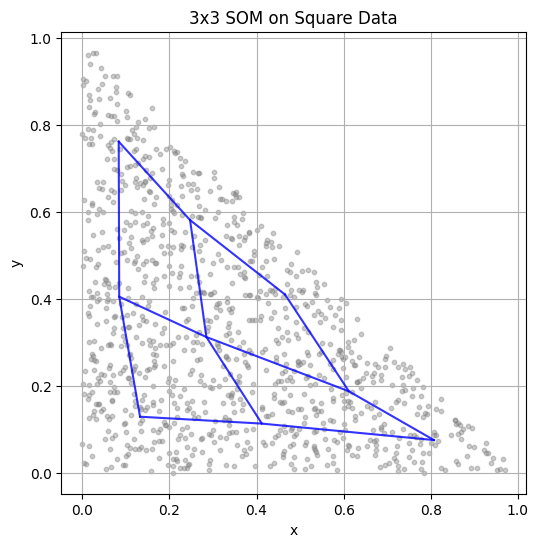

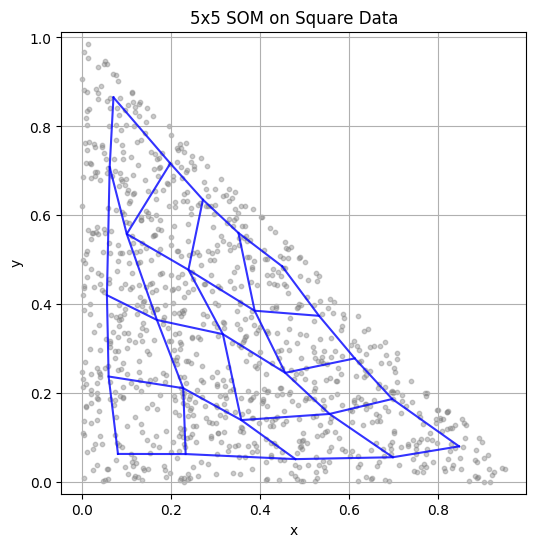

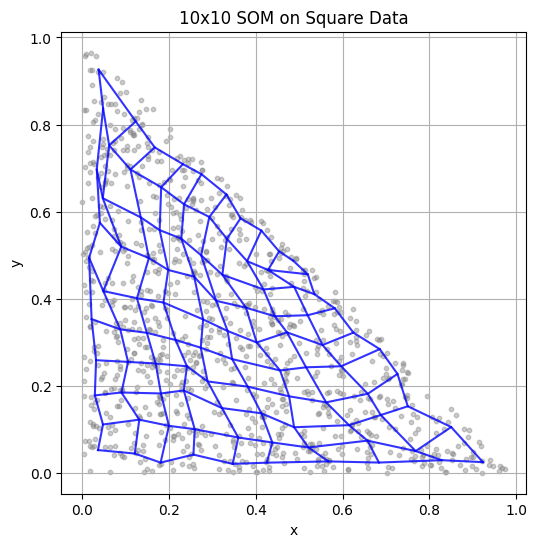

In [10]:
# Example usage:
som = SOM(M=3, data=generate_triangle_data(num_points=1000), epochs=100)
som.train()
som.plot(title="3x3 SOM on Square Data")
# Example usage:
som = SOM(M=5, data=generate_triangle_data(num_points=1000), epochs=100)
som.train()
som.plot(title="5x5 SOM on Square Data")
# Example usage:
som = SOM(M=10, data=generate_triangle_data(num_points=1000), epochs=100)
som.train()
som.plot(title="10x10 SOM on Square Data")

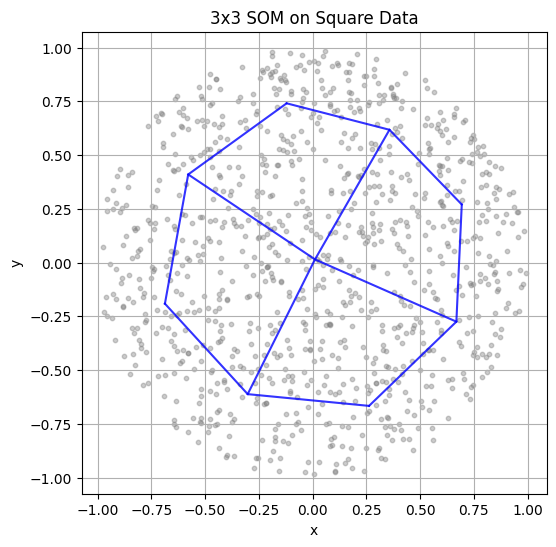

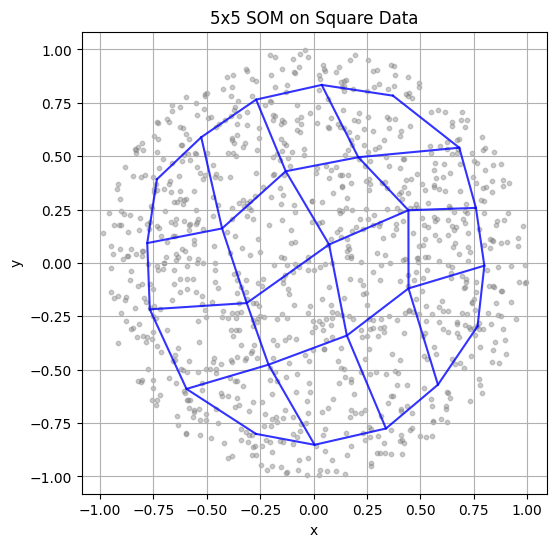

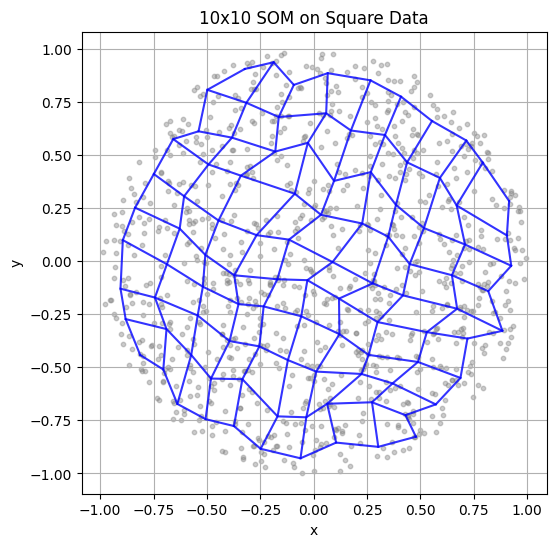

In [9]:
# Example usage:-
som = SOM(M=3, data=generate_circle_data(num_points=1000), epochs=100)
som.train()
som.plot(title="3x3 SOM on Square Data")
# Example usage:
som = SOM(M=5, data=generate_circle_data(num_points=1000), epochs=100)
som.train()
som.plot(title="5x5 SOM on Square Data")
# Example usage:
som = SOM(M=10, data=generate_circle_data(num_points=1000), epochs=100)
som.train()
som.plot(title="10x10 SOM on Square Data")